In [1]:
# Simple KNN on MNIST
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from keras.datasets import mnist
import numpy as np

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x = np.concatenate((x_train, x_test))
y = np.concatenate((y_train, y_test))
x = x.reshape((x.shape[0], -1))
x = np.divide(x, 255.)
# 10 clusters
n_clusters = 10
# Runs in parallel 4 CPUs
kmeans = KMeans(n_clusters=n_clusters, n_init=20, n_jobs=4)
# Train K-Means.
y_pred_kmeans = kmeans.fit_predict(x)
# Evaluate the K-Means clustering accuracy.
accuracy = accuracy_score(y, y_pred_kmeans)

In [3]:
# Design autoencoder and decoder
from keras.layers import Input, Dense
from keras.models import Model

from keras.datasets import mnist
import numpy as np

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [4]:
# Let's also create a separate encoder model:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [6]:
#create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [7]:
# Insert model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [8]:
(x_train, _), (x_test, _) = mnist.load_data()
# We will normalize all values between 0 and 1 and we will flatten the 28x28 images into vectors of size 784.
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


In [9]:
# let's train our autoencoder for 50 epochs:
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 20us/step - loss: 0.2761 - val_loss: 0.1896
Epoch 2/50
60000/60000 [==============================] - 1s 16us/step - loss: 0.1706 - val_loss: 0.1531
Epoch 3/50
60000/60000 [==============================] - 1s 16us/step - loss: 0.1434 - val_loss: 0.1331
Epoch 4/50
60000/60000 [==============================] - 1s 15us/step - loss: 0.1284 - val_loss: 0.1218
Epoch 5/50
60000/60000 [==============================] - 1s 16us/step - loss: 0.1190 - val_loss: 0.1139
Epoch 6/50
60000/60000 [==============================] - 1s 17us/step - loss: 0.1123 - val_loss: 0.1083
Epoch 7/50
60000/60000 [==============================] - 2s 33us/step - loss: 0.1074 - val_loss: 0.1040
Epoch 8/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.1035 - val_loss: 0.1006
Epoch 9/50
60000/60000 [==============================] - 1s 22us/step - loss: 0.1004 - val_loss: 0.0979
Epoch

In [10]:
# After 50 epochs, the autoencoder seems to reach a stable train/test loss value of about 0.09. 
# We can try to visualize the reconstructed inputs and the encoded representations. We will use Matplotlib.
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

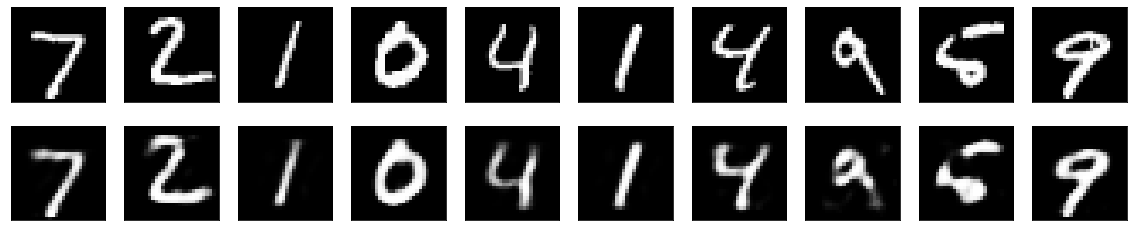

In [12]:
# use Matplotlib 
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()



In [13]:
# deeper model
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,)) 
#decoder_layer = autoencoder.layers[-1] 
#decoder = Model(encoded_input, decoder_layer(encoded_input)) 

autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 28us/step - loss: 0.2402 - val_loss: 0.1634
Epoch 2/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.1489 - val_loss: 0.1345
Epoch 3/50
60000/60000 [==============================] - 2s 28us/step - loss: 0.1286 - val_loss: 0.1215
Epoch 4/50
60000/60000 [==============================] - 2s 29us/step - loss: 0.1191 - val_loss: 0.1140
Epoch 5/50
60000/60000 [==============================] - 2s 33us/step - loss: 0.1128 - val_loss: 0.1088
Epoch 6/50
60000/60000 [==============================] - 2s 33us/step - loss: 0.1084 - val_loss: 0.1054
Epoch 7/50
60000/60000 [==============================] - 1s 25us/step - loss: 0.1049 - val_loss: 0.1020
Epoch 8/50
60000/60000 [==============================] - 1s 23us/step - loss: 0.1022 - val_loss: 0.0993
Epoch 9/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.0999 - val_loss: 0.0977
Epoch

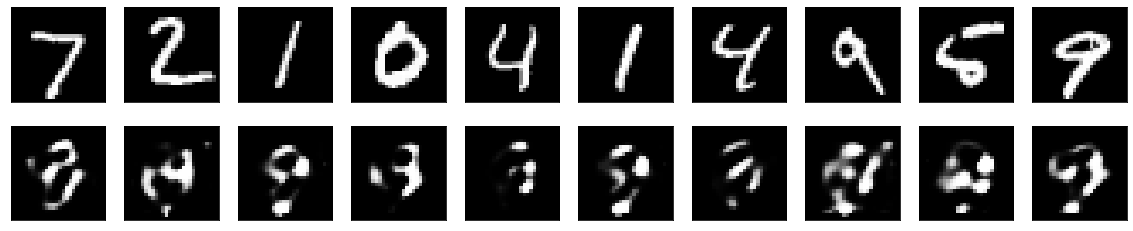

In [14]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [16]:
import pandas as pd

# Regression example
def get_data():
    #get train data
    train_data_path ="train.csv"
    train = pd.read_csv(train_data_path)
    
    #get test data
    test_data_path ="test.csv"
    test = pd.read_csv(test_data_path)
    
    return train , test

def get_combined_data():
  #reading train data
  train , test = get_data()

  target = train.SalePrice
  train.drop(['SalePrice'],axis = 1 , inplace = True)

  combined = train.append(test)
  combined.reset_index(inplace=True)
  combined.drop(['index', 'Id'], inplace=True, axis=1)
  return combined, target

#Load train and test data into pandas DataFrames
train_data, test_data = get_data()

#Combine train and test data to process them together
combined, target = get_combined_data()

In [17]:
combined.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,...,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,...,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,...,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,...,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [18]:
# Drop missing values
def get_cols_with_no_nans(df,col_type):
    '''
    Arguments :
    df : The dataframe to process
    col_type : 
          num : to only get numerical columns with no nans
          no_num : to only get nun-numerical columns with no nans
          all : to get any columns with no nans    
    '''
    if (col_type == 'num'):
        predictors = df.select_dtypes(exclude=['object'])
    elif (col_type == 'no_num'):
        predictors = df.select_dtypes(include=['object'])
    elif (col_type == 'all'):
        predictors = df
    else :
        print('Error : choose a type (num, no_num, all)')
        return 0
    cols_with_no_nans = []
    for col in predictors.columns:
        if not df[col].isnull().any():
            cols_with_no_nans.append(col)
    return cols_with_no_nans

# Call the function
num_cols = get_cols_with_no_nans(combined , 'num')
cat_cols = get_cols_with_no_nans(combined , 'no_num')

In [19]:
# How many columns we got
print ('Number of numerical columns with no nan values :',len(num_cols))
print ('Number of nun-numerical columns with no nan values :',len(cat_cols))

Number of numerical columns with no nan values : 25
Number of nun-numerical columns with no nan values : 20


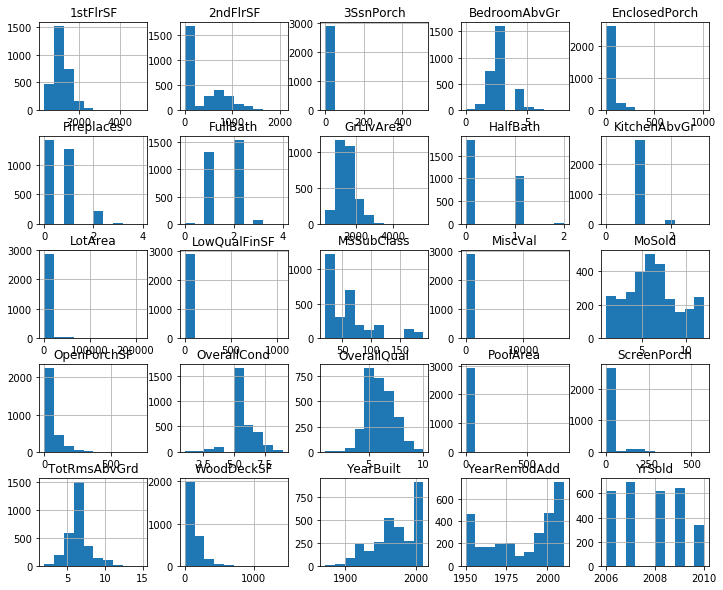

In [20]:
import matplotlib.pyplot as plt
# Plot the variables
combined = combined[num_cols + cat_cols]
combined.hist(figsize = (12,10))
plt.show()

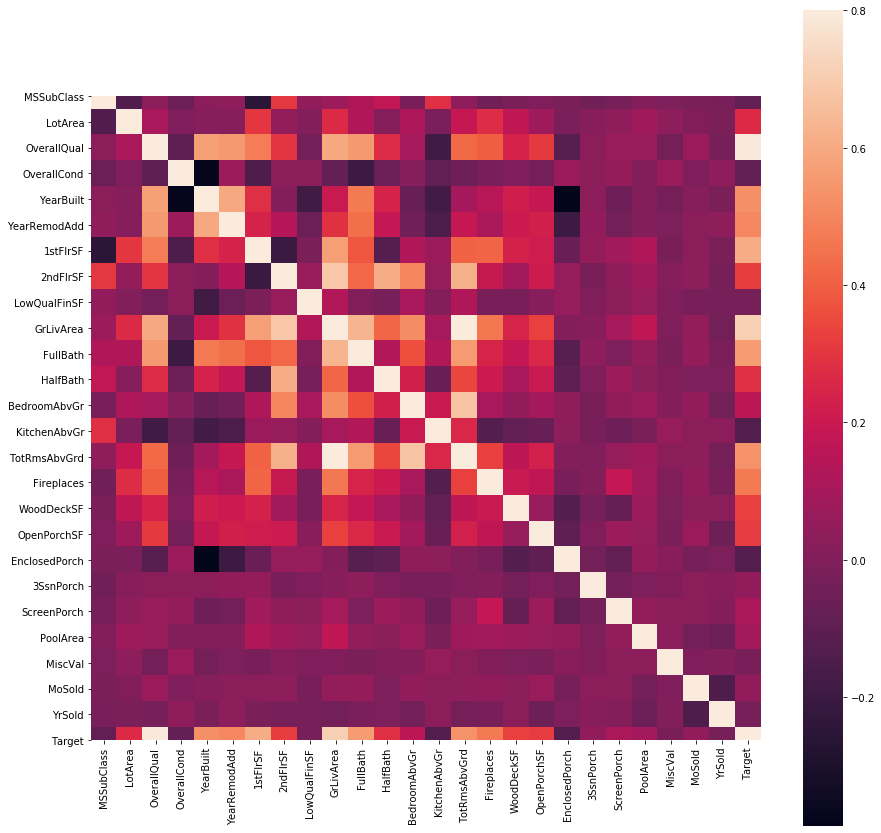

In [21]:
import seaborn as sb
# How many of features are correlated
train_data = train_data[num_cols + cat_cols]
train_data['Target'] = target

C_mat = train_data.corr()
fig = plt.figure(figsize = (15,15))

sb.heatmap(C_mat, vmax = .8, square = True)
plt.show()
# Looks like 15 correlated features

In [22]:
import numpy as np
# We will encode the categorical features using one hot encoding.
def oneHotEncode(df,colNames):
    for col in colNames:
        if( df[col].dtype == np.dtype('object')):
            dummies = pd.get_dummies(df[col],prefix=col)
            df = pd.concat([df,dummies],axis=1)

            #drop the encoded column
            df.drop([col],axis = 1 , inplace=True)
    return df
    

print('There were {} columns before encoding categorical features'.format(combined.shape[1]))
combined = oneHotEncode(combined, cat_cols)
print('There are {} columns after encoding categorical features'.format(combined.shape[1]))

There were 45 columns before encoding categorical features
There are 149 columns after encoding categorical features


In [23]:
# Split data to train and test
def split_combined():
    global combined
    train = combined[:1460]
    test = combined[1460:]

    return train , test 
  
train, test = split_combined()

In [24]:
from keras.layers import Input, Dense
from keras import Sequential

# Use ‘relu’ as the activation function for the hidden layers
# Use a ‘normal’ initializer as the kernal_intializer

#Define the output layer with only one node
#Use ‘linear ’as the activation function for the output layer
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 128)               19200     
_________________________________________________________________
dense_10 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_11 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_12 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 257       
Total params: 184,065
Trainable params: 184,065
Non-trainable params: 0
_________________________________________________________________


In [58]:
from keras.callbacks import ModelCheckpoint 
# Define a checkpoint to save the data 
checkpoint_name = "C:/Users/rothg/Desktop/ANLY 535 Machine Learning II/Lecture 13 Unsupervised Learning/Weights-{epoch:03d}--{val_loss:.5f}.hdf5" 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto') 
callbacks_list = [checkpoint] 
# Train the model
hist=NN_model.fit(train, target, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list) 


Train on 1168 samples, validate on 292 samples
Epoch 1/500
1168/1168 [==============================] - 0s 167us/step - loss: 16706.3098 - mean_absolute_error: 16706.3125 - val_loss: 22116.4778 - val_mean_absolute_error: 22116.4785

Epoch 00001: val_loss improved from inf to 22116.47785, saving model to C:/Users/rothg/Desktop/ANLY 535 Machine Learning II/Lecture 13 Unsupervised Learning/Weights-001--22116.47785.hdf5
Epoch 2/500
1168/1168 [==============================] - 0s 96us/step - loss: 14214.7109 - mean_absolute_error: 14214.7119 - val_loss: 19759.5936 - val_mean_absolute_error: 19759.5957

Epoch 00002: val_loss improved from 22116.47785 to 19759.59364, saving model to C:/Users/rothg/Desktop/ANLY 535 Machine Learning II/Lecture 13 Unsupervised Learning/Weights-002--19759.59364.hdf5
Epoch 3/500
1168/1168 [==============================] - 0s 70us/step - loss: 14193.2321 - mean_absolute_error: 14193.2314 - val_loss: 21471.3216 - val_mean_absolute_error: 21471.3223

Epoch 00003: va

In [59]:
 # Load wights file of the best model : 
wights_file = "C:/Users/rothg/Desktop/ANLY 535 Machine Learning II/Lecture 13 Unsupervised Learning/Weights-148--18453.29618.hdf5" 
# choose the best checkpoint 
NN_model.load_weights(wights_file) 
# load it 
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])


In [60]:
# Make predictions
predictions = NN_model.predict(test)

In [61]:
predictions

array([[122356.73],
       [161293.53],
       [171552.19],
       ...,
       [154867.8 ],
       [141311.89],
       [210042.61]], dtype=float32)

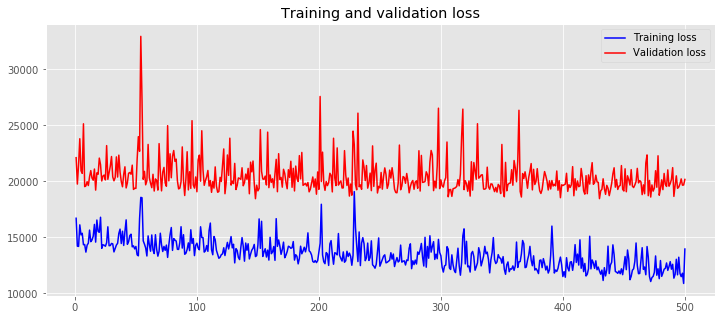

In [62]:
plt.style.use('ggplot')

def plot_history(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(loss) + 1)

    plt.figure(figsize=(12, 5))
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()


plot_history(hist)

In [65]:
import keras
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience= 30)
callbacks_list= ModelCheckpoint("C:/Users/rothg/Desktop/ANLY 535 Machine Learning II/Lecture 13 Unsupervised Learning/Weights-{epoch:03d}--{val_loss:.5f}.hdf5", monitor='val_loss', save_best_only = True)
callbacks = [early_stop, callbacks_list]

In [66]:
hist = NN_model.fit(train, target, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks)

Train on 1168 samples, validate on 292 samples
Epoch 1/500
1168/1168 [==============================] - 0s 82us/step - loss: 12905.3367 - mean_absolute_error: 12905.3369 - val_loss: 19618.1880 - val_mean_absolute_error: 19618.1875
Epoch 2/500
1168/1168 [==============================] - 0s 67us/step - loss: 13577.8569 - mean_absolute_error: 13577.8584 - val_loss: 19628.6211 - val_mean_absolute_error: 19628.6230
Epoch 3/500
1168/1168 [==============================] - 0s 67us/step - loss: 13565.1579 - mean_absolute_error: 13565.1562 - val_loss: 19739.2702 - val_mean_absolute_error: 19739.2715
Epoch 4/500
1168/1168 [==============================] - 0s 73us/step - loss: 13489.1705 - mean_absolute_error: 13489.1699 - val_loss: 18869.1879 - val_mean_absolute_error: 18869.1875
Epoch 5/500
1168/1168 [==============================] - 0s 78us/step - loss: 13896.5366 - mean_absolute_error: 13896.5381 - val_loss: 20765.6291 - val_mean_absolute_error: 20765.6289
Epoch 6/500
1168/1168 [==========

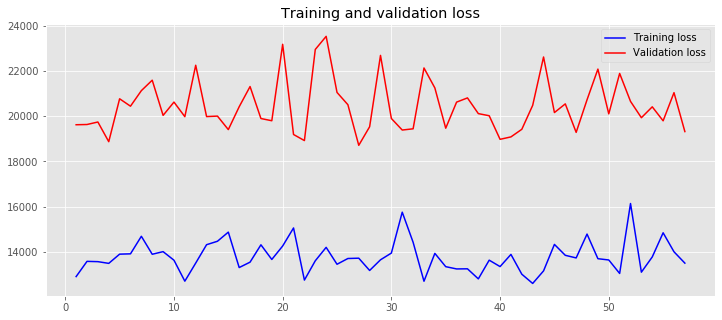

In [67]:
plot_history(hist)